In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [26]:
df=pd.read_csv('winequality-red.csv')
df.head(1500)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,7.0,0.430,0.02,1.9,0.080,15.0,28.0,0.99492,3.35,0.81,10.6,6
1496,7.7,0.540,0.26,1.9,0.089,23.0,147.0,0.99636,3.26,0.59,9.7,5
1497,6.9,0.740,0.03,2.3,0.054,7.0,16.0,0.99508,3.45,0.63,11.5,6
1498,6.6,0.895,0.04,2.3,0.068,7.0,13.0,0.99582,3.53,0.58,10.8,6


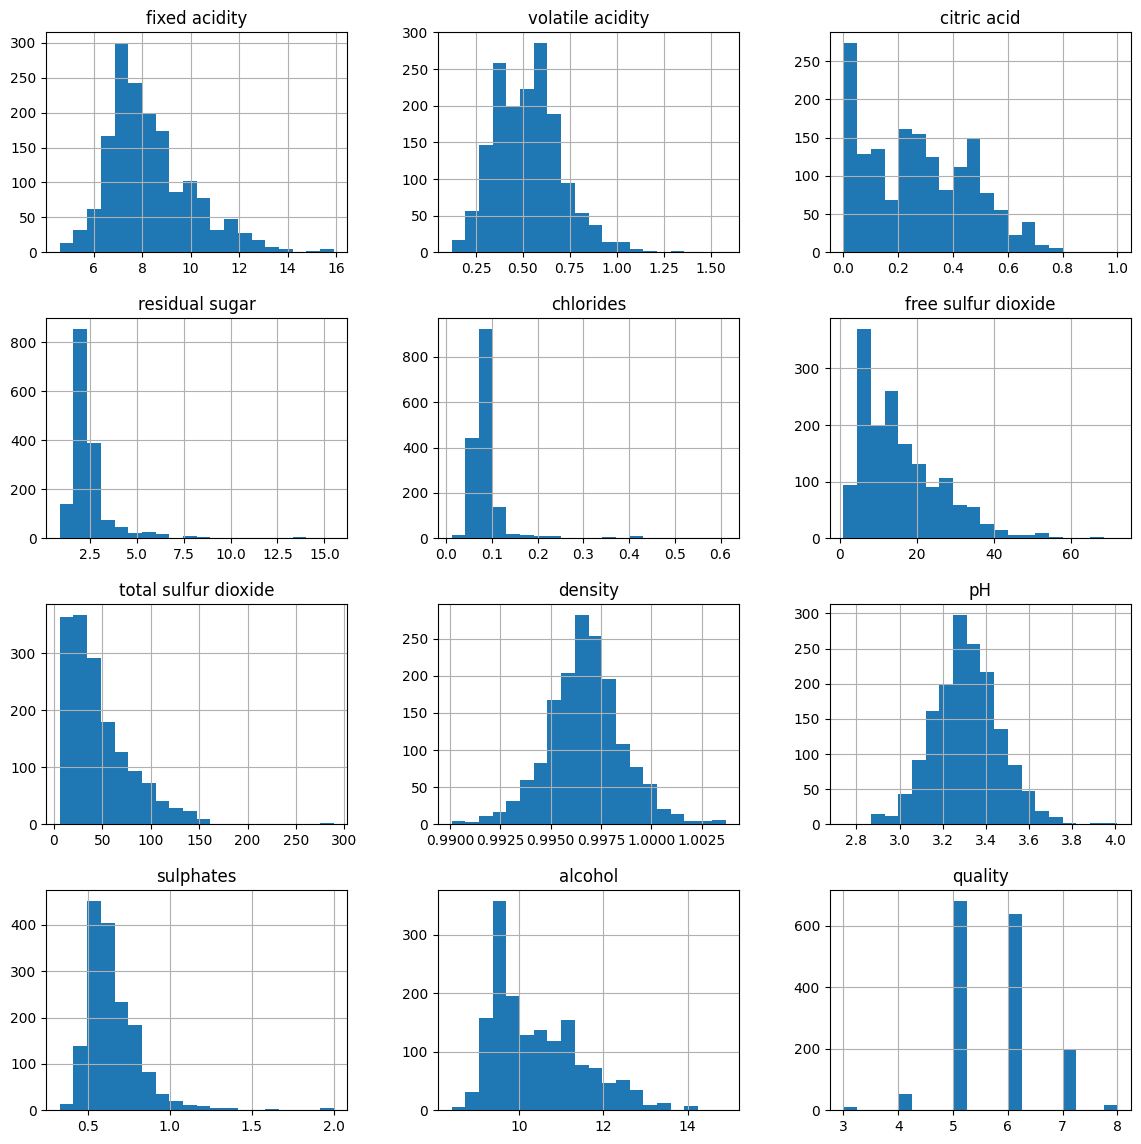

In [27]:
df.hist(bins=20,figsize=(14,14))
pt.show()

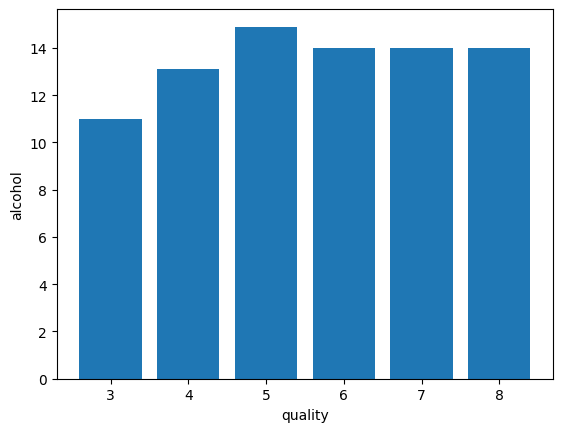

In [28]:
pt.bar(df['quality'],df['alcohol'])
pt.xlabel("quality")
pt.ylabel('alcohol')
pt.show()

In [29]:
df=df.drop('total sulfur dioxide',axis=1)
df['best quality']=[1 if x>5 else 0 for x in df.quality]
df.replace({'white':1,'red':0},inplace=True)
features=df.drop(['quality','best quality'],axis=1)
target=df['best quality']

In [30]:
xtrain,xtest,ytrain,ytest=train_test_split(features,target,test_size=0.2,random_state=40)
xtrain.shape,xtest.shape

((1279, 10), (320, 10))

In [31]:
norm=MinMaxScaler()
xtrain=norm.fit_transform(xtrain)
xtest=norm.transform(xtest)

In [32]:
model=[LogisticRegression(),XGBClassifier(),SVC(kernel='rbf')]
for i in range(3):
  model[i].fit(xtrain,ytrain)
  print(f'{model[i]}: ')
  print('Train Accuracy : ',metrics.roc_auc_score(ytrain,model[i].predict(xtrain)))
  print('Validation Accuracy : ',metrics.roc_auc_score(ytest,model[i].predict(xtest)))
  print()



LogisticRegression(): 
Train Accuracy :  0.7286886534333447
Validation Accuracy :  0.765345444536196

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...): 
Train Accuracy :  1.0
Validation Accuracy :  0.8345523180370414

SVC(): 
Train Accuracy :  0.7699408577589806
Validation Accuracy :  0.793067516

In [34]:
print(metrics.classification_report(ytest,model[1].predict(xtest)))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       147
           1       0.86      0.83      0.84       173

    accuracy                           0.83       320
   macro avg       0.83      0.83      0.83       320
weighted avg       0.84      0.83      0.83       320

